In [1]:
import sys
import asyncio
import logging

import numpy as np

from lsst.ts import salobj

import matplotlib.pyplot as plt

from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign

In [2]:
stream_handler = logging.StreamHandler(sys.stdout)

logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [22]:
cwfs = LatissCWFSAlign(index=1)

In [23]:
await cwfs.start_task

RemoteEvent(ATMCS, 0, target) falling behind; read 100 messages
RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 52 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 52 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 100 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) falling behind; read 52 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 52 messages
RemoteEvent(ATHeaderService, 0, heartbeat) falling behind; read 52 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 52 messages
RemoteEvent(ATPneumatics, 0, heartbeat) falling behind; read 53 messages
Read historical data in 0.79 sec
Read historical data in 1.06 sec
Read historical data in 1.45 sec
Read historical data in 2.58 sec
Read historical data in 2.85 sec
Read historical data in 3.78 sec
Read historical data in 4.47 sec
Read historical data in 5.75 sec
Read historical

In [24]:
cwfs.filter = "empty_1"
cwfs.grating = "empty_1"

In [11]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
intraImage expId for target: 2020021900212
extraImage expId for target: 2020021900213


In [12]:
cwfs.intra_visit_id = 2020021900212
cwfs.extra_visit_id = 2020021900213

In [13]:
await cwfs.run_cwfs()

Running cwfs in 2020021900212/2020021900213.


/home/saluser/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:309: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200219_000212.yaml
AT_O_20200219_000212: Forcing detector serial to ITL-3800C-068
AT_O_20200219_000212: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200219_000212.yaml
AT_O_20200219_000212: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200219_000212: Dark time less than exposure time. Setting dark time to the exposure time.
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200219_000212.yaml
AT_O_20200219_000212: Forcing detector serial to ITL-3800C-068
AT_O_20200219_000212: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200219_000212.yaml
AT_O_20200219_000212: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200219_000212:

update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


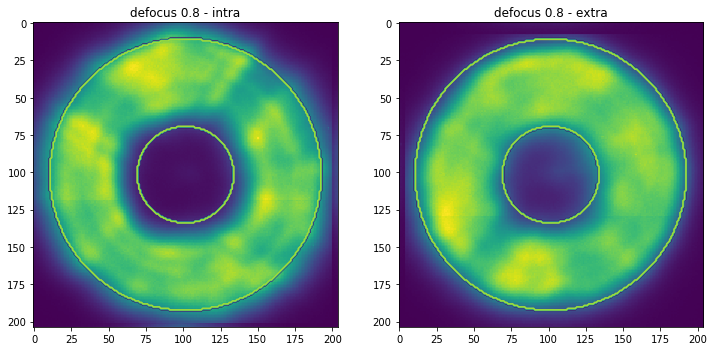

RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 17 messages


In [14]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [15]:
cwfs.show_results()

Measured zernike coeficients: [-56.11930022559307, 4.204948337576146, -150.47642861764427]
De-rotated zernike coeficients: [  56.27616849    0.22429582 -150.47642862]
Hexapod offset: [-0.42958907  0.00171218  0.03582772]
Telescope offsets: [-25.77534435   0.10273091   0.        ]



In [16]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.00171218,
          'y': 0.42958907,
          'z': 0.03582772,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [17]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
intraImage expId for target: 2020021900214
extraImage expId for target: 2020021900215


In [25]:
cwfs.intra_visit_id = 2020021900214
cwfs.extra_visit_id = 2020021900215

In [27]:
cwfs.angle = 0.

In [28]:
await cwfs.run_cwfs()

Running cwfs in 2020021900214/2020021900215.


/home/saluser/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:309: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200219_000214.yaml
AT_O_20200219_000214: Forcing detector serial to ITL-3800C-068
AT_O_20200219_000214: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200219_000214.yaml
AT_O_20200219_000214: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200219_000214: Dark time less than exposure time. Setting dark time to the exposure time.
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200219_000214.yaml
AT_O_20200219_000214: Forcing detector serial to ITL-3800C-068
AT_O_20200219_000214: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200219_000214.yaml
AT_O_20200219_000214: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200219_000214:

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


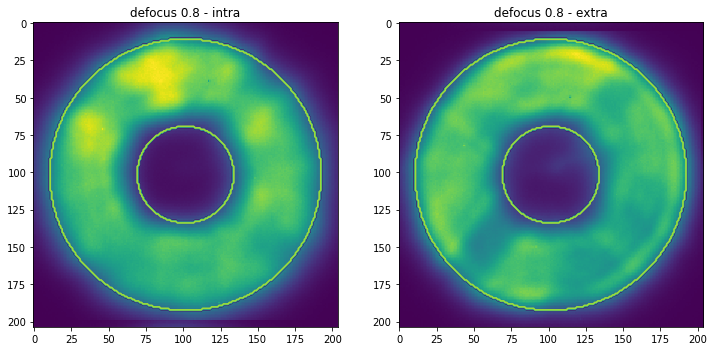

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 13 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 13 messages


In [29]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [30]:
cwfs.show_results()

Measured zernike coeficients: [-97.46463534464773, -0.16818561653187153, 26.971535807302015]
De-rotated zernike coeficients: [-90.06709847  37.24649248  26.97153581]
Hexapod offset: [ 0.6875351   0.28432437 -0.00642179]
Telescope offsets: [41.25210617 17.0594622   0.        ]

